In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
X_train = pd.read_csv('/content/selected_features.csv')
X_test = pd.read_csv('/content/selected_features_test.csv')
y_train = pd.read_csv('/content/y_train.csv')
y_test = pd.read_csv('/content/y_test (1).csv')
X_train.head()

,PhoneService_Yes,Contract_One year,OnlineSecurity_Yes,PaymentMethod_Electronic check,TechSupport_Yes,Contract_Two year,PaperlessBilling_Yes,InternetService_Fiber optic,OnlineBackup_Yes,SeniorCitizen,Dependents_Yes,DeviceProtection_Yes,MultipleLines_Yes,MonthlyCharges,tenure,PaymentMethod_Credit card (automatic),TotalCharges
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,49.20,35,0.0,1701.65
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0,0.0,0.0,75.10,15,0.0,1151.55
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0,1.0,0.0,0.0,40.55,13,0.0,590.35
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0,0.0,1.0,0.0,73.50,26,1.0,1905.70
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,44.55,1,0.0,44.55


In [14]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5634, 17)
X_test shape: (1409, 17)
y_train shape: (5634, 1)
y_test shape: (1409, 1)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Ensure y is a 1D array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Train Logistic Regression with higher iterations
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8048261178140526
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1035
         1.0       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7899219304471257
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1035
         1.0       0.64      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### Handling Imbalanced Data with SMOTE
Imbalanced datasets can cause models to favor the majority class, leading to poor generalization.  
To address this, we will use **Synthetic Minority Over-sampling Technique (SMOTE)** to balance the dataset before training.

#### Steps:
1. **Check class distribution** to confirm imbalance.
2. **Apply SMOTE** to generate synthetic samples for the minority class.
3. **Train the model on the balanced dataset.**

We will use `imbalanced-learn` to implement SMOTE.


In [17]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Class distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts())


Class distribution after SMOTE:
 0.0    4139
1.0    4139
Name: count, dtype: int64


In [18]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data

    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression ---
Accuracy: 0.7295954577714692
              precision    recall  f1-score   support

         0.0       0.89      0.72      0.80      1035
         1.0       0.49      0.76      0.60       374

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.73      0.74      1409


--- Decision Tree ---
Accuracy: 0.7331440738112136
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      1035
         1.0       0.50      0.50      0.50       374

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409


--- Random Forest ---
Accuracy: 0.7750177430801988
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      1035
         1.0       0.59      0.50      0.54       374

    accuracy        

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the model
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga']  # Different solvers
}

# Perform Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose=1)
grid_search.fit(X_train_smote, y_train_smote)  # Convert y_train to 1D using .ravel()

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train final model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'C': 100, 'solver': 'liblinear'}
Accuracy: 0.7288857345635202
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.72      0.80      1035
         1.0       0.49      0.76      0.60       374

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.73      0.74      1409



In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced')

# Train the model
svm_model.fit(X_train, y_train)  # Convert y_train to 1D using .ravel()

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.673527324343506
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.70      0.76      1035
         1.0       0.42      0.59      0.49       374

    accuracy                           0.67      1409
   macro avg       0.62      0.65      0.62      1409
weighted avg       0.72      0.67      0.69      1409



ROC-AUC Score: 0.7124673848459014


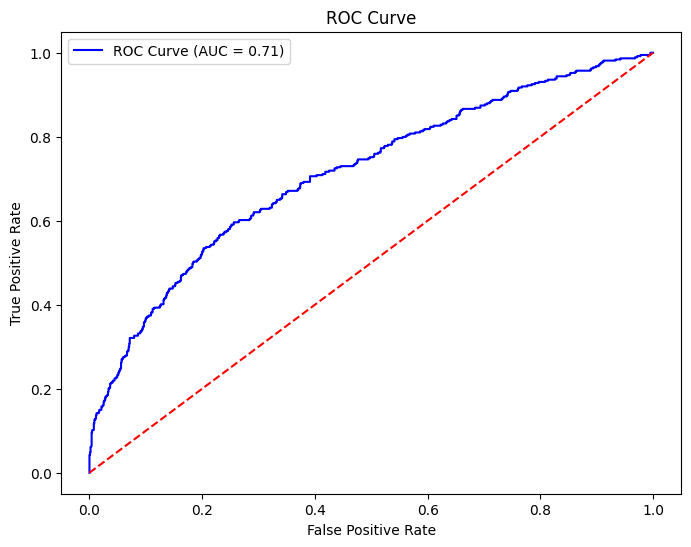

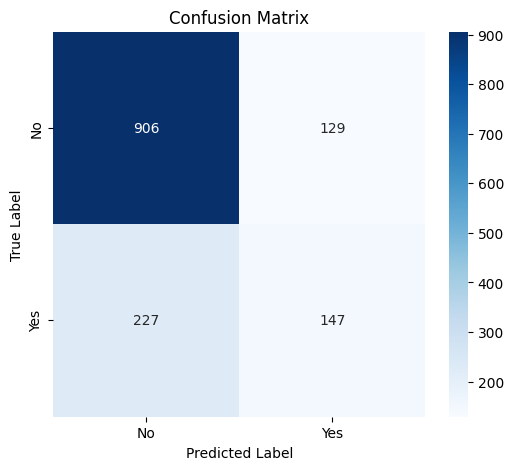

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute ROC-AUC score
y_pred_proba = best_svm.decision_function(X_test)  # Get probability estimates
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Print ROC-AUC Score
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Predict on test set
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.decision_function(X_test)  # For ROC-AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print("📌 Model Performance:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-Score: {f1:.4f}")
print(f"✅ ROC-AUC: {roc_auc:.4f}")

# Classification report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\n🟢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.